In [1]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

# From pyscript Library
from Plotting import *
from Dictionary import *
from HelperFunctions import *
from CutFunctions import *

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

<h1>Specify Mass</h1>

In [2]:
m = 200

<h1>Configuration Stuff Here</h1>

In [3]:
ifSave = True
savePath = "../plot_files/14Mar2024_m"+str(m)+"_v3_test/"

In [4]:
ifCut = True

In [5]:
ifTune = False

TuneCut = {}

if m == 140:
    TuneCut = {
    'crumbs': 0 
    , 'Muon' : 0.04
    , 'Proton' : 1.0
    , 'Pion' : 0.8
    , 'OneShowerFracMore': -0.16
    , 'OneShowerFracLess': 0.5
    , 'TwoShowerFracMore': 0
    , 'TwoShowerFracLess': 0.5
    , 'OneShowerTheta': 17.6
    , 'TwoShowerTheta': 24.4
    }
    

if m == 200:
    TuneCut = {
    'crumbs': 0 
    , 'Muon' : 0.04
    , 'Proton' : 1.0
    , 'Pion' : 0.8
    , 'OneShowerFracMore': -0.08
    , 'OneShowerFracLess': 0.5
    , 'TwoShowerFracMore': -0.02
    , 'TwoShowerFracLess': 0.5
    , 'OneShowerTheta': 20
    , 'TwoShowerTheta': 25
    }

if m == 240:
    TuneCut = {
    'crumbs': 0 
    , 'Muon' : 0.04
    , 'Proton' : 1.0
    , 'Pion' : 0.8
    , 'OneShowerFracMore': -0.12
    , 'OneShowerFracLess': 0.5
    , 'TwoShowerFracMore': 0
    , 'TwoShowerFracLess': 0.5
    , 'OneShowerTheta': 24.2
    , 'TwoShowerTheta': 24.6
    }

<h1> Read in PKL Dataframe </h1>

<h3> HNL </h3>

In [6]:
df_hnl = pd.DataFrame()

for i in range(0, 3):
    hnl_path = "../pkl_files/v3/hnl_m"+str(m)+"_50k_v3_slc_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    df_hnl = pd.concat((df_hnl, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_hnl = pd.DataFrame()

for i in range(0, 3):
    hnl_path = "../pkl_files/v3/hnl_m"+str(m)+"_50k_v3_subrun_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_hnl = pd.concat((dfsubrun_hnl, df), ignore_index=True)
    file.close()

../pkl_files/v3/hnl_m200_50k_v3_slc_0.pkl
../pkl_files/v3/hnl_m200_50k_v3_slc_1.pkl
../pkl_files/v3/hnl_m200_50k_v3_slc_2.pkl
../pkl_files/v3/hnl_m200_50k_v3_subrun_0.pkl
../pkl_files/v3/hnl_m200_50k_v3_subrun_1.pkl
../pkl_files/v3/hnl_m200_50k_v3_subrun_2.pkl


<h3> TPC Neutrino </h3>

In [7]:
df_nu = pd.DataFrame()

for i in range(0, 13):
    nu_path = "../pkl_files/v3/rockbox_100k_v3_slc_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    df_nu = pd.concat((df_nu, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_nu = pd.DataFrame()

for i in range(0, 13):
    nu_path = "../pkl_files/v3/rockbox_100k_v3_subrun_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_nu = pd.concat((dfsubrun_nu, df), ignore_index=True)
    file.close()

../pkl_files/v3/rockbox_100k_v3_slc_0.pkl
../pkl_files/v3/rockbox_100k_v3_slc_1.pkl
../pkl_files/v3/rockbox_100k_v3_slc_2.pkl
../pkl_files/v3/rockbox_100k_v3_slc_3.pkl
../pkl_files/v3/rockbox_100k_v3_slc_4.pkl
../pkl_files/v3/rockbox_100k_v3_slc_5.pkl
../pkl_files/v3/rockbox_100k_v3_slc_6.pkl
../pkl_files/v3/rockbox_100k_v3_slc_7.pkl
../pkl_files/v3/rockbox_100k_v3_slc_8.pkl
../pkl_files/v3/rockbox_100k_v3_slc_9.pkl
../pkl_files/v3/rockbox_100k_v3_slc_10.pkl
../pkl_files/v3/rockbox_100k_v3_slc_11.pkl
../pkl_files/v3/rockbox_100k_v3_slc_12.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_0.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_1.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_2.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_3.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_4.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_5.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_6.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_7.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_8.pkl
../pkl_files/v3/rockbox_100k_v3_subrun_9.pkl
.

<h3> Intime Cosmics </h3>

In [8]:
df_cos = pd.DataFrame()

for i in range(0, 3):
    cos_path = "../pkl_files/v3/intime_50k_v3_slc_{}.pkl".format(i)
    print(cos_path)
    
    file = open(cos_path, 'rb')
    df = pickle.load(file)
    
    df_cos = pd.concat((df_cos, df), ignore_index=True)
    file.close()
    
#--------------------------------------------------#
dfsubrun_cos = pd.DataFrame()

for i in range(0, 3):
    cos_path = "../pkl_files/v3/intime_50k_v3_subrun_{}.pkl".format(i)
    print(cos_path)
    
    file = open(cos_path, 'rb')
    df = pickle.load(file)
    
    dfsubrun_cos = pd.concat((dfsubrun_cos, df), ignore_index=True)
    file.close()

../pkl_files/v3/intime_50k_v3_slc_0.pkl
../pkl_files/v3/intime_50k_v3_slc_1.pkl
../pkl_files/v3/intime_50k_v3_slc_2.pkl
../pkl_files/v3/intime_50k_v3_subrun_0.pkl
../pkl_files/v3/intime_50k_v3_subrun_1.pkl
../pkl_files/v3/intime_50k_v3_subrun_2.pkl


<h1>Some Scaling Voodoo</h1>

<h3>HNL</h3>

In [9]:
true_signals = 1
true_nonfv_signals = 1
total_true_signals = 1
start_signals = 1
start_nonfv_signals = 1
total_start_signals = 1
    
if m == 140:
    true_signals = 6772 + 6963 + 7008 + 7076 + 7026
    true_nonfv_signals = 3028 + 3037 + 2992 + 2924 + 3024
    total_true_signals = 9800 + 10000 + 10000 + 10000 + 10050
    start_signals = 6521 + 6706 + 6762 + 6832 + 6764
    start_nonfv_signals = 2556 + 2606 + 2538 + 2524 + 2594
    total_start_signals = 9077 + 9312 + 9300 + 9356 + 9358

if m == 200:
    true_signals = 7003 + 6926 + 3402
    true_nonfv_signals = 3047 + 3074 + 1498
    total_true_signals = 10050 + 10000 + 4900
    start_signals = 6686 + 6589 + 3249
    start_nonfv_signals = 2579 + 2557 + 1259
    total_start_signals = 9265 + 9146 + 4508

if m == 240:
    true_signals = 6866 +6946 +7027 +7000 +6980
    true_nonfv_signals = 2984 +3054 +2973 +3000 +3070
    total_true_signals = 9850 +10000 +10000 +10000 +10050
    start_signals = 6533 +6588 +6671 +6653 +6613
    start_nonfv_signals = 2497 +2538 +2494 +2517 +2566
    total_start_signals = 9030 +9126 +9165 +9170 +9179

In [10]:
#Sanity Check: ifScale == 1 i.e. Umu = 1e-7 and 3 years POT
#true counts ~1.5k
#start counts ~1.4k
scale_pot_hnl, hnl_spill = calc_scaling_pot(dfsubrun_hnl, df_hnl, ifScale = 1)

true_signals = true_signals * scale_pot_hnl
true_nonfv_signals = true_nonfv_signals * scale_pot_hnl
total_true_signals = total_true_signals * scale_pot_hnl

start_signals = start_signals * scale_pot_hnl
start_nonfv_signals = start_nonfv_signals * scale_pot_hnl
total_start_signals = total_start_signals * scale_pot_hnl

true_counts = total_true_signals
start_counts = total_start_signals
print("true counts = " + str(true_counts))
print("start counts = " + str(start_counts))

-----------------------------------------------
sample pot = 16845996629205517860864.000000
sample spill = 24950.000000
target spill = 1481.064050
scale pot factor = 0.059361
-----------------------------------------------
true counts = 1481.0640503598795
start counts = 1360.5012813706644


In [11]:
simU = 1 #already squared

if m == 140:
    simU = 1e-5
if m == 200:
    simU = 1e-7
if m == 240:
    simU = 1e-7
    
scaleHNLPlot = 1

if m ==140:    
    scaleHNLPlot = 3.7
if m ==200:    
    scaleHNLPlot = 80
if m ==240:    
    scaleHNLPlot = 17.2

In [12]:
plotU = getUfromScaleFactor(simU, scaleHNLPlot)

true_counts = true_counts * scaleHNLPlot
start_counts =  start_counts * scaleHNLPlot

print("Sim Umu = " +str(simU))
print("Scale Umu by " + str(scaleHNLPlot))
print("Scaled Umu = " + str(plotU))

print("Scaled true counts = " + str(true_counts))
print("Scaled start counts = " + str(start_counts))

Sim Umu = 1e-07
Scale Umu by 80
Scaled Umu = 8.944271909999158e-07
Scaled true counts = 118485.12402879036
Scaled start counts = 108840.10250965315


In [13]:
scale_pot_hnl, hnl_spill = calc_scaling_pot(dfsubrun_hnl, df_hnl, ifScale = scaleHNLPlot)
df_hnl['simU'] = simU
df_hnl['scaledU'] = plotU

del dfsubrun_hnl

-----------------------------------------------
sample pot = 210574957865068986368.000000
sample spill = 24950.000000
target spill = 118485.124029
scale pot factor = 4.748903
-----------------------------------------------


<h3>Rock Box Neutrino</h3>

In [14]:
scale_pot_nu, nu_spill = calc_scaling_pot(dfsubrun_nu, df_nu)

del  dfsubrun_nu

-----------------------------------------------
sample pot = 11308003973680062464.000000
sample spill = 750000.000000
target spill = 66324702.551013
scale pot factor = 88.432937
-----------------------------------------------


<h3>Intime Cosmics</h3>

In [15]:
scale_pot_cosmics = calc_scaling_spill(dfsubrun_cos, df_cos, hnl_spill, nu_spill)

del  dfsubrun_cos

-----------------------------------------------
target total spill = 200000000.0
hnl + nu spill = 66443187.675041504
target intime spill = 133556812.32495847
scale pot factor = 46.29352246965632
-----------------------------------------------


<h1> Make Beam Bucket - Pre Cosmics </h1>

type 3, pot 88.43293673468362, n_nu 324637.3107530236
type 4, pot 88.43293673468362, n_nu 581888.7237142182
type 5, pot 88.43293673468362, n_nu 4286609.742340319
type 6, pot 88.43293673468362, n_nu 34311.97945305725
type 7, pot 88.43293673468362, n_nu 1879465.204422231
type 8, pot 88.43293673468362, n_nu 3170851.379558816
type 9, pot 88.43293673468362, n_nu 16653779.078812355


<Figure size 432x288 with 0 Axes>

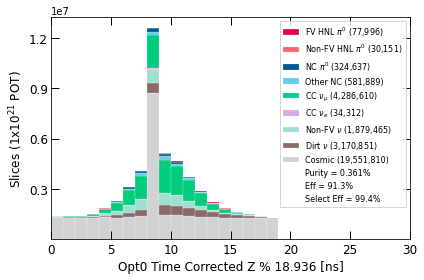

In [16]:
width = 18.936

df_hnl['mod_t'] = df_hnl['slc_opt0_time_corrected_Z_pandora']%width
df_nu['mod_t'] = df_nu['slc_opt0_time_corrected_Z_pandora']%width
df_cos['mod_t'] = df_cos['slc_opt0_time_corrected_Z_pandora']%width
#----------------------------------------------
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_precosmics.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Save Purity and Eff </h1>

In [17]:
purity_arr, eff_arr, cut_arr = [], [], []

In [18]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)


purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Clear Cosmics Removal")

print(purity_arr)
print(eff_arr)
print(cut_arr)

type 3, pot 88.43293673468362, n_nu 324637.3107530236
type 4, pot 88.43293673468362, n_nu 581888.7237142182
type 5, pot 88.43293673468362, n_nu 4286609.742340319
type 6, pot 88.43293673468362, n_nu 34311.97945305725
type 7, pot 88.43293673468362, n_nu 1879465.204422231
type 8, pot 88.43293673468362, n_nu 3170851.379558816
type 9, pot 88.43293673468362, n_nu 16653779.078812355
[0.4]
[99.4]
['Clear Cosmics Removal']


<h1> CRUMBS </h1>

type 3, pot 88.43293673468362, n_nu 324637.3107530236
type 4, pot 88.43293673468362, n_nu 581888.7237142182
type 5, pot 88.43293673468362, n_nu 4286609.742340319
type 6, pot 88.43293673468362, n_nu 34311.97945305725
type 7, pot 88.43293673468362, n_nu 1879465.204422231
type 8, pot 88.43293673468362, n_nu 3170851.379558816
type 9, pot 88.43293673468362, n_nu 16653779.078812355


<Figure size 432x288 with 0 Axes>

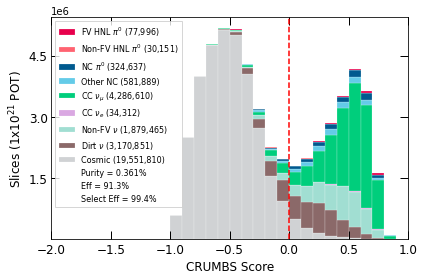

In [19]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_crumbs_score', 
                    xmin = -2, xmax =1, xnbin = 30,
                    xtitle = 'CRUMBS Score'
                    )

plt.axvline(x = TuneCut['crumbs'], c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"crumbs_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [20]:
if ifTune:
    vary_crumbsScore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    
    if ifSave:
        plt.savefig(savePath+"/crumbs_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [21]:
score = TuneCut['crumbs']

print(score)

if ifCut:
    df_hnl = cutCosmics(df_hnl, crumbsScore = score)
    df_nu = cutCosmics(df_nu, crumbsScore = score)
    df_cos = cutCosmics(df_cos, crumbsScore = score)

0


<h3>Save Purity/Eff</h3>

In [22]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("CRUMBS")

print(purity_arr)
print(eff_arr)
print(cut_arr)

type 3, pot 88.43293673468362, n_nu 277237.25666323316
type 4, pot 88.43293673468362, n_nu 466218.44246525207
type 5, pot 88.43293673468362, n_nu 4028208.7012015735
type 6, pot 88.43293673468362, n_nu 32278.02190815952
type 7, pot 88.43293673468362, n_nu 1621329.4620936895
type 8, pot 88.43293673468362, n_nu 2217721.1874323958
type 9, pot 88.43293673468362, n_nu 384152.6771754657
[0.4, 1.1]
[99.4, 92.5]
['Clear Cosmics Removal', 'CRUMBS']


<h1> Make Beam Bucket - Post Crumbs</h1>

type 3, pot 88.43293673468362, n_nu 277237.25666323316
type 4, pot 88.43293673468362, n_nu 466218.44246525207
type 5, pot 88.43293673468362, n_nu 4028208.7012015735
type 6, pot 88.43293673468362, n_nu 32278.02190815952
type 7, pot 88.43293673468362, n_nu 1621329.4620936895
type 8, pot 88.43293673468362, n_nu 2217721.1874323958
type 9, pot 88.43293673468362, n_nu 384152.6771754657


<Figure size 432x288 with 0 Axes>

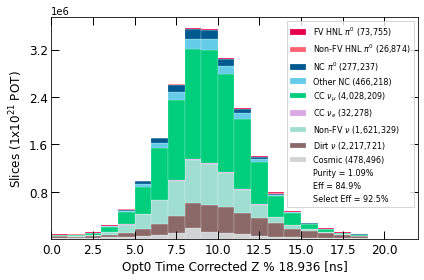

In [23]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 22, xnbin = 22,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postcrumbs.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1> Fiducial Volume </h1>

type 3, pot 88.43293673468362, n_nu 277237.25666323316
type 4, pot 88.43293673468362, n_nu 466218.44246525207
type 5, pot 88.43293673468362, n_nu 4028208.7012015735
type 6, pot 88.43293673468362, n_nu 32278.02190815952
type 7, pot 88.43293673468362, n_nu 1621329.4620936895
type 8, pot 88.43293673468362, n_nu 2217721.1874323958
type 9, pot 88.43293673468362, n_nu 384152.6771754657


<Figure size 432x288 with 0 Axes>

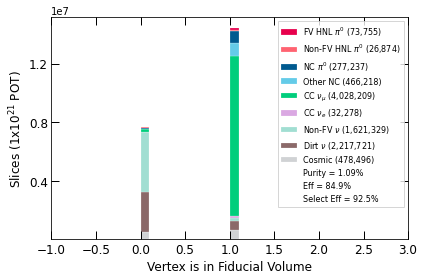

In [24]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_is_fv', 
                    xmin = -1, xmax = 3, xnbin = 40,
                    xtitle = 'Vertex is in Fiducial Volume'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"fv_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3>Apply Cut</h3>

In [25]:
if ifCut:
    df_hnl = cutFV(df_hnl)
    df_nu = cutFV(df_nu)
    df_cos = cutFV(df_cos)

<h3>Save Purity/Eff</h3>

In [26]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Vertex In FV")

print(purity_arr)
print(eff_arr)
print(cut_arr)

type 3, pot 88.43293673468362, n_nu 263087.9867856838
type 4, pot 88.43293673468362, n_nu 447824.3916244379
type 5, pot 88.43293673468362, n_nu 3932966.4283383195
type 6, pot 88.43293673468362, n_nu 31305.259604078
type 7, pot 88.43293673468362, n_nu 99487.05382651907
type 8, pot 88.43293673468362, n_nu 301291.0154550671
type 9, pot 88.43293673468362, n_nu 212681.2128469141
[0.4, 1.1, 1.3]
[99.4, 92.5, 66.6]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV']


<h1> Make Beam Bucket - Post FV</h1>

type 3, pot 88.43293673468362, n_nu 263087.9867856838
type 4, pot 88.43293673468362, n_nu 447824.3916244379
type 5, pot 88.43293673468362, n_nu 3932966.4283383195
type 6, pot 88.43293673468362, n_nu 31305.259604078
type 7, pot 88.43293673468362, n_nu 99487.05382651907
type 8, pot 88.43293673468362, n_nu 301291.0154550671
type 9, pot 88.43293673468362, n_nu 212681.2128469141


<Figure size 432x288 with 0 Axes>

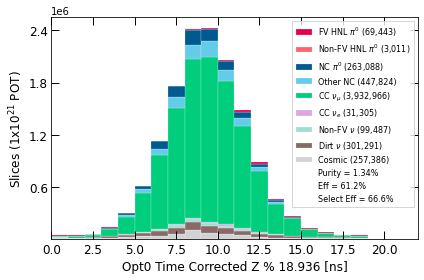

In [27]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 22, xnbin = 22,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postFV.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Muon Rejection</h1>

type 3, pot 88.43293673468362, n_nu 263087.9867856838
type 4, pot 88.43293673468362, n_nu 447824.3916244379
type 5, pot 88.43293673468362, n_nu 3932966.4283383195
type 6, pot 88.43293673468362, n_nu 31305.259604078
type 7, pot 88.43293673468362, n_nu 99487.05382651907
type 8, pot 88.43293673468362, n_nu 301291.0154550671
type 9, pot 88.43293673468362, n_nu 212681.2128469141


<Figure size 432x288 with 0 Axes>

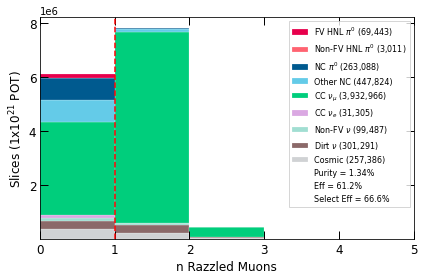

type 3, pot 88.43293673468362, n_nu 263087.9867856838
type 4, pot 88.43293673468362, n_nu 447824.3916244379
type 5, pot 88.43293673468362, n_nu 3932966.4283383195
type 6, pot 88.43293673468362, n_nu 31305.259604078
type 7, pot 88.43293673468362, n_nu 99487.05382651907
type 8, pot 88.43293673468362, n_nu 301291.0154550671
type 9, pot 88.43293673468362, n_nu 212681.2128469141


<Figure size 432x288 with 0 Axes>

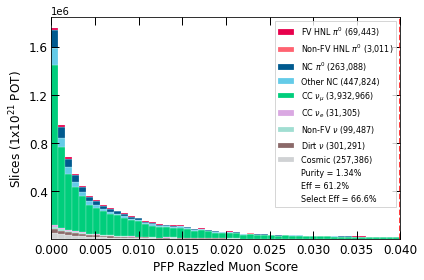

In [28]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_muons', 
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Muons'
                    )
plt.axvline(x = 1, c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_muon_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_muon_score', 
                    xmin = 0, xmax = 0.04, xnbin = 50,
                    xtitle = 'PFP Razzled Muon Score'
                    )
plt.axvline(x =  TuneCut['Muon'], c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_muon_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [29]:
if ifTune:
    vary_MuonScore(df_hnl, df_nu, df_cos , true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/muon_tuning.png", dpi =200)

<h3> Apply Cut</h3>

In [30]:
muonScore = TuneCut['Muon']

print(muonScore)

if ifCut:
    df_hnl = cutMuon(df_hnl, muonScore =muonScore)
    df_nu = cutMuon(df_nu, muonScore =muonScore)
    df_cos = cutMuon(df_cos,muonScore =muonScore)

0.04


<h3>Save Purity/Eff</h3>

In [31]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Muon Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

type 3, pot 88.43293673468362, n_nu 176335.27584895914
type 4, pot 88.43293673468362, n_nu 247258.4911101754
type 5, pot 88.43293673468362, n_nu 168906.90916324573
type 6, pot 88.43293673468362, n_nu 18394.050840814194
type 7, pot 88.43293673468362, n_nu 30951.527857139266
type 8, pot 88.43293673468362, n_nu 58631.03705509524
type 9, pot 88.43293673468362, n_nu 82507.92997345982
[0.4, 1.1, 1.3, 6.6]
[99.4, 92.5, 66.6, 51.1]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut']


<h1> Make Beam Bucket - Post Muon</h1>

type 3, pot 88.43293673468362, n_nu 176335.27584895914
type 4, pot 88.43293673468362, n_nu 247258.4911101754
type 5, pot 88.43293673468362, n_nu 168906.90916324573
type 6, pot 88.43293673468362, n_nu 18394.050840814194
type 7, pot 88.43293673468362, n_nu 30951.527857139266
type 8, pot 88.43293673468362, n_nu 58631.03705509524
type 9, pot 88.43293673468362, n_nu 82507.92997345982


<Figure size 432x288 with 0 Axes>

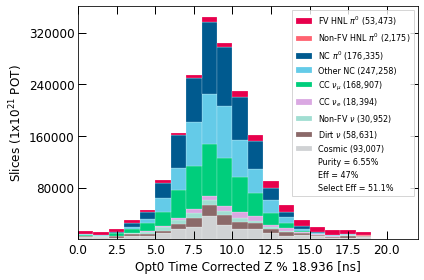

In [32]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 22, xnbin = 22,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postmuon.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Proton Rejection</h1>

type 3, pot 88.43293673468362, n_nu 176335.27584895914
type 4, pot 88.43293673468362, n_nu 247258.4911101754
type 5, pot 88.43293673468362, n_nu 168906.90916324573
type 6, pot 88.43293673468362, n_nu 18394.050840814194
type 7, pot 88.43293673468362, n_nu 30951.527857139266
type 8, pot 88.43293673468362, n_nu 58631.03705509524
type 9, pot 88.43293673468362, n_nu 82507.92997345982


<Figure size 432x288 with 0 Axes>

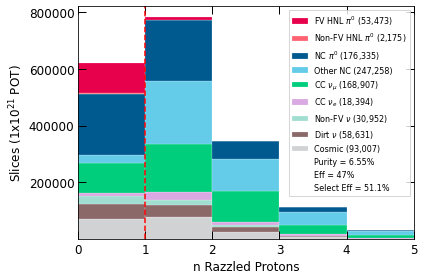

type 3, pot 88.43293673468362, n_nu 176335.27584895914
type 4, pot 88.43293673468362, n_nu 247258.4911101754
type 5, pot 88.43293673468362, n_nu 168906.90916324573
type 6, pot 88.43293673468362, n_nu 18394.050840814194
type 7, pot 88.43293673468362, n_nu 30951.527857139266
type 8, pot 88.43293673468362, n_nu 58631.03705509524
type 9, pot 88.43293673468362, n_nu 82507.92997345982


<Figure size 432x288 with 0 Axes>

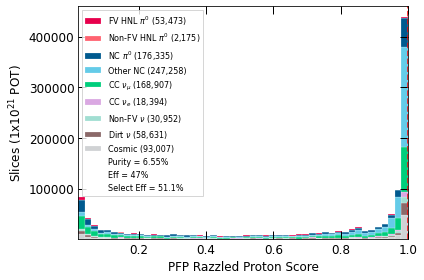

In [33]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_protons_thresh', 
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Protons'
                    )
plt.axvline(x = 1, c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_proton_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_proton_score', 
                    xmin = 0.02, xmax = 1, xnbin = 50,
                    xtitle = 'PFP Razzled Proton Score'
                    )
plt.axvline(x =  TuneCut['Proton'], c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_proton_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [34]:
if ifTune:
    vary_ProtonScore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/proton_tuning.png", dpi =200)

<h3>Apply Cut</h3>

In [35]:
protonScore = TuneCut['Proton']

print(protonScore)

if ifCut:
    df_hnl = cutProton(df_hnl, nProton = 0, protonScore = protonScore)
    df_nu = cutProton(df_nu, nProton = 0, protonScore = protonScore)
    df_cos = cutProton(df_cos, nProton = 0, protonScore = protonScore)

1.0


<h3>Save Purity/Eff</h3>

In [36]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Proton Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

type 3, pot 88.43293673468362, n_nu 88167.63792447957
type 4, pot 88.43293673468362, n_nu 14326.135751018746
type 5, pot 88.43293673468362, n_nu 49699.310444892195
type 6, pot 88.43293673468362, n_nu 4598.5127102035485
type 7, pot 88.43293673468362, n_nu 13972.404004080012
type 8, pot 88.43293673468362, n_nu 23257.862361221793
type 9, pot 88.43293673468362, n_nu 25380.2528428542
[0.4, 1.1, 1.3, 6.6, 18.9]
[99.4, 92.5, 66.6, 51.1, 48.1]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut']


<h1> Make Beam Bucket - Post Proton</h1>

type 3, pot 88.43293673468362, n_nu 88167.63792447957
type 4, pot 88.43293673468362, n_nu 14326.135751018746
type 5, pot 88.43293673468362, n_nu 49699.310444892195
type 6, pot 88.43293673468362, n_nu 4598.5127102035485
type 7, pot 88.43293673468362, n_nu 13972.404004080012
type 8, pot 88.43293673468362, n_nu 23257.862361221793
type 9, pot 88.43293673468362, n_nu 25380.2528428542


<Figure size 432x288 with 0 Axes>

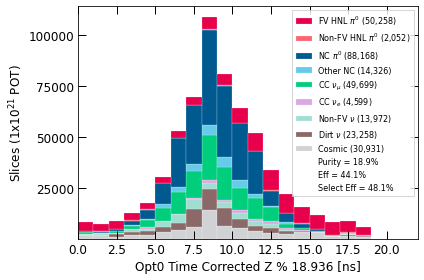

In [37]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 22, xnbin = 22,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postproton.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Pion Rejection</h1>

type 3, pot 88.43293673468362, n_nu 88167.63792447957
type 4, pot 88.43293673468362, n_nu 14326.135751018746
type 5, pot 88.43293673468362, n_nu 49699.310444892195
type 6, pot 88.43293673468362, n_nu 4598.5127102035485
type 7, pot 88.43293673468362, n_nu 13972.404004080012
type 8, pot 88.43293673468362, n_nu 23257.862361221793
type 9, pot 88.43293673468362, n_nu 25380.2528428542


<Figure size 432x288 with 0 Axes>

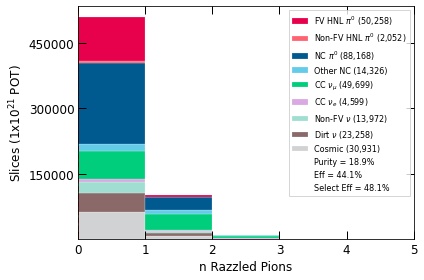

type 3, pot 88.43293673468362, n_nu 88167.63792447957
type 4, pot 88.43293673468362, n_nu 14326.135751018746
type 5, pot 88.43293673468362, n_nu 49699.310444892195
type 6, pot 88.43293673468362, n_nu 4598.5127102035485
type 7, pot 88.43293673468362, n_nu 13972.404004080012
type 8, pot 88.43293673468362, n_nu 23257.862361221793
type 9, pot 88.43293673468362, n_nu 25380.2528428542


<Figure size 432x288 with 0 Axes>

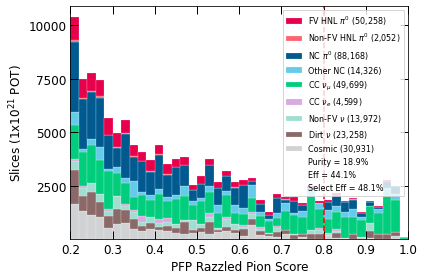

In [38]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_pions_thresh', 
                    xmin = 0, xmax = 5, xnbin = 5,
                    xtitle = 'n Razzled Pions'
                    )
plt.axvline(x = 0, c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_pion_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_pion_score', 
                    xmin = 0.2, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Pion Score'
                    )
plt.axvline(x =  TuneCut['Pion'], c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_pion_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [39]:
if ifTune:
    vary_PionScore(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/pion_tuning.png", dpi =200)

<h3>Apply Cut </h3>

In [40]:
pionScore = TuneCut['Pion']

print(pionScore)

if ifCut:
    df_hnl = cutPion(df_hnl, nPion = 0, pionScore = pionScore)
    df_nu = cutPion(df_nu, nPion = 0, pionScore = pionScore)
    df_cos = cutPion(df_cos, nPion = 0, pionScore = pionScore)

0.8


<h3>Save Purity/Eff</h3>

In [41]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Pion Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

type 3, pot 88.43293673468362, n_nu 77820.98432652159
type 4, pot 88.43293673468362, n_nu 8047.397242856209
type 5, pot 88.43293673468362, n_nu 30951.527857139266
type 6, pot 88.43293673468362, n_nu 3802.6162795913956
type 7, pot 88.43293673468362, n_nu 11407.848838774187
type 8, pot 88.43293673468362, n_nu 19366.813144895714
type 9, pot 88.43293673468362, n_nu 22815.697677548374
[0.4, 1.1, 1.3, 6.6, 18.9, 21.9]
[99.4, 92.5, 66.6, 51.1, 48.1, 46.2]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut']


<h1> Make Beam Bucket - Post Pion</h1>

type 3, pot 88.43293673468362, n_nu 77820.98432652159
type 4, pot 88.43293673468362, n_nu 8047.397242856209
type 5, pot 88.43293673468362, n_nu 30951.527857139266
type 6, pot 88.43293673468362, n_nu 3802.6162795913956
type 7, pot 88.43293673468362, n_nu 11407.848838774187
type 8, pot 88.43293673468362, n_nu 19366.813144895714
type 9, pot 88.43293673468362, n_nu 22815.697677548374


<Figure size 432x288 with 0 Axes>

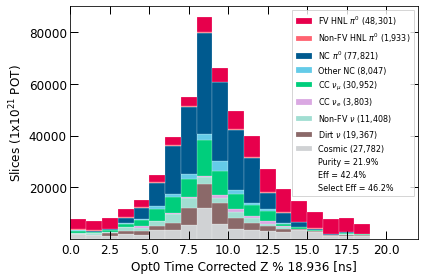

In [42]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 22, xnbin = 22,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + " [ns]"
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postcosmics_postpion.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Opt0 Frac </h1>

<h3>Both 1 and 2+ Shower in Slice</h3>

type 3, pot 88.43293673468362, n_nu 77820.98432652159
type 4, pot 88.43293673468362, n_nu 8047.397242856209
type 5, pot 88.43293673468362, n_nu 30951.527857139266
type 6, pot 88.43293673468362, n_nu 3802.6162795913956
type 7, pot 88.43293673468362, n_nu 11407.848838774187
type 8, pot 88.43293673468362, n_nu 19366.813144895714
type 9, pot 88.43293673468362, n_nu 22815.697677548374


<Figure size 432x288 with 0 Axes>

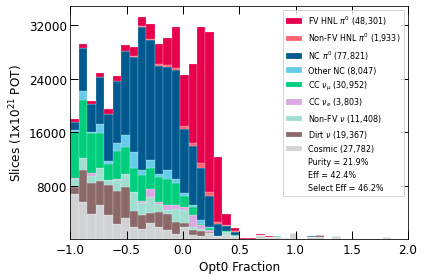

In [43]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Split 1 and 2+ shower cases </h3>

In [44]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> 1 shower cases </h3>

type 3, pot 88.43293673468362, n_nu 17067.55678979394
type 4, pot 88.43293673468362, n_nu 3537.3174693873448
type 5, pot 88.43293673468362, n_nu 11407.848838774187
type 6, pot 88.43293673468362, n_nu 2210.8234183670907
type 7, pot 88.43293673468362, n_nu 3360.4515959179776
type 8, pot 88.43293673468362, n_nu 6897.769065305322
type 9, pot 88.43293673468362, n_nu 6544.037318366588


<Figure size 432x288 with 0 Axes>

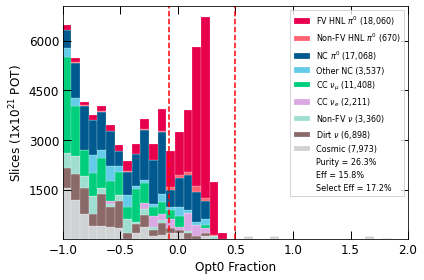

In [45]:
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction'
                    )
plt.axvline(x =  TuneCut['OneShowerFracMore'], c = 'r', linestyle = '--')
plt.axvline(x =  TuneCut['OneShowerFracLess'], c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_one_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [46]:
if ifTune:
    vary_OpT0FracMore(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_more_one_shw_tuning.png", dpi =200)

In [47]:
if ifTune:
    vary_OpT0FracLess(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_less_one_shw_tuning.png", dpi =200)

<h3> 2+ shower cases </h3>

type 3, pot 88.43293673468362, n_nu 60753.42753672765
type 4, pot 88.43293673468362, n_nu 4510.079773468865
type 5, pot 88.43293673468362, n_nu 19543.67901836508
type 6, pot 88.43293673468362, n_nu 1591.7928612243052
type 7, pot 88.43293673468362, n_nu 8047.397242856209
type 8, pot 88.43293673468362, n_nu 12469.04407959039
type 9, pot 88.43293673468362, n_nu 16271.660359181786


<Figure size 432x288 with 0 Axes>

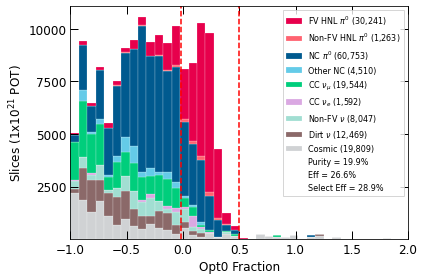

In [48]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
                    true_counts, start_counts, 
                    'slc_opt0_frac', 
                    xmin = -1, xmax = 2, xnbin = 40,
                    xtitle = 'Opt0 Fraction'
                    )
plt.axvline(x =  TuneCut['TwoShowerFracMore'], c = 'r', linestyle = '--')
plt.axvline(x =  TuneCut['TwoShowerFracLess'], c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0frac_two_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [49]:
if ifTune:
    vary_OpT0FracMore(df_hnl_shw2, df_nu_shw2, df_cos_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_more_two_shw_tuning.png", dpi =200)

In [50]:
if ifTune:
    vary_OpT0FracLess(df_hnl_shw2, df_nu_shw2, df_cos_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/opt0frac_less_two_shw_tuning.png", dpi =200)

<h3> Apply Cut </h3>

<h3> 1 shower only: harsh cut</h3>

In [51]:
#fracMore = 
fracMore = TuneCut['OneShowerFracMore']
print(fracMore)
fracLess = TuneCut['OneShowerFracLess']
print(fracLess)

if ifCut:
    df_hnl_shw1 = cutOpt0Frac(df_hnl_shw1, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_nu_shw1 = cutOpt0Frac(df_nu_shw1, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_cos_shw1 = cutOpt0Frac(df_cos_shw1, Opt0FracMore = fracMore, Opt0FracLess = fracLess)

-0.08
0.5


<h3> 2+ showers: cut on primary + less harsh cut </h3>

In [52]:
#fracMore = TuneCut['Opt0FracMore']
fracMore = TuneCut['TwoShowerFracMore']
print(fracMore)
fracLess = TuneCut['TwoShowerFracLess']
print(fracLess)

if ifCut:
    df_hnl_shw2 = cutOpt0Frac(df_hnl_shw2, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_nu_shw2 = cutOpt0Frac(df_nu_shw2, Opt0FracMore = fracMore, Opt0FracLess = fracLess)
    df_cos_shw2 = cutOpt0Frac(df_cos_shw2, Opt0FracMore = fracMore, Opt0FracLess = fracLess)

-0.02
0.5


In [53]:
df_hnl = apply_shower_cut(df_hnl, df_hnl_shw1, df_hnl_shw2)

df_nu = apply_shower_cut(df_nu, df_nu_shw1, df_nu_shw2)

df_cos = apply_shower_cut(df_cos, df_cos_shw1, df_cos_shw2)

<h3>Save Purity/Eff</h3>

In [54]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Opt0 Fraction")

print(purity_arr)
print(eff_arr)
print(cut_arr)

type 3, pot 88.43293673468362, n_nu 15917.928612243051
type 4, pot 88.43293673468362, n_nu 1061.1952408162035
type 5, pot 88.43293673468362, n_nu 1945.5246081630396
type 6, pot 88.43293673468362, n_nu 2122.390481632407
type 7, pot 88.43293673468362, n_nu 1061.1952408162035
type 8, pot 88.43293673468362, n_nu 1061.1952408162035
type 9, pot 88.43293673468362, n_nu 1591.7928612243052
[0.4, 1.1, 1.3, 6.6, 18.9, 21.9, 61.7]
[99.4, 92.5, 66.6, 51.1, 48.1, 46.2, 37.2]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Opt0 Fraction']


<h1> Make Beam Bucket - Post Opt0 Frac</h1>

type 3, pot 88.43293673468362, n_nu 15917.928612243051
type 4, pot 88.43293673468362, n_nu 1061.1952408162035
type 5, pot 88.43293673468362, n_nu 1945.5246081630396
type 6, pot 88.43293673468362, n_nu 2122.390481632407
type 7, pot 88.43293673468362, n_nu 1061.1952408162035
type 8, pot 88.43293673468362, n_nu 1061.1952408162035
type 9, pot 88.43293673468362, n_nu 1591.7928612243052


<Figure size 432x288 with 0 Axes>

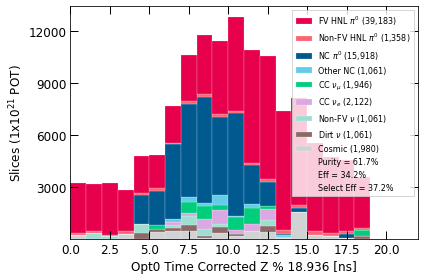

In [55]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 22, xnbin = 22,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postopt0.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Opt0 Measured PE </h1>

<h3>Both 1 and 2+ Shower in Slice</h3>

type 3, pot 88.43293673468362, n_nu 15917.928612243051
type 4, pot 88.43293673468362, n_nu 1061.1952408162035
type 5, pot 88.43293673468362, n_nu 1945.5246081630396
type 6, pot 88.43293673468362, n_nu 2122.390481632407
type 7, pot 88.43293673468362, n_nu 1061.1952408162035
type 8, pot 88.43293673468362, n_nu 1061.1952408162035
type 9, pot 88.43293673468362, n_nu 1591.7928612243052


<Figure size 432x288 with 0 Axes>

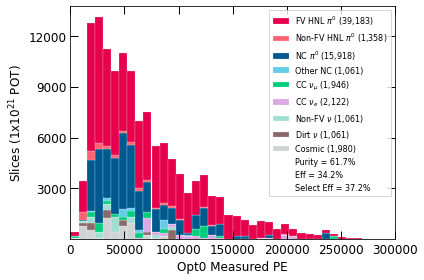

In [56]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_measPE', 
                    xmin = 0, xmax = 300000, xnbin = 40,
                    xtitle = 'Opt0 Measured PE'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"opt0PE_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Split 1 and 2+ shower cases </h3>

In [57]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

#df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> 1 shower cases </h3>

type 3, pot 88.43293673468362, n_nu 3802.6162795913956
type 4, pot 88.43293673468362, n_nu 707.463493877469
type 5, pot 88.43293673468362, n_nu 707.463493877469
type 6, pot 88.43293673468362, n_nu 1326.4940510202543
type 7, pot 88.43293673468362, n_nu 176.86587346936724
type 8, pot 88.43293673468362, n_nu 442.1646836734181
type 9, pot 88.43293673468362, n_nu 265.2988102040509


<Figure size 432x288 with 0 Axes>

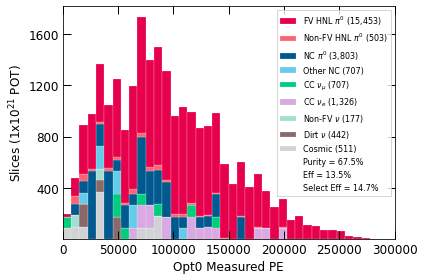

In [58]:
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_measPE', 
                    xmin = 0, xmax = 300000, xnbin = 40,
                    xtitle = 'Opt0 Measured PE'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_opt0PE_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> 2+ shower cases </h3>

type 3, pot 88.43293673468362, n_nu 12115.312332651656
type 4, pot 88.43293673468362, n_nu 353.7317469387345
type 5, pot 88.43293673468362, n_nu 1238.0611142855707
type 6, pot 88.43293673468362, n_nu 795.8964306121526
type 7, pot 88.43293673468362, n_nu 884.3293673468362
type 8, pot 88.43293673468362, n_nu 619.0305571427854
type 9, pot 88.43293673468362, n_nu 1326.4940510202543


<Figure size 432x288 with 0 Axes>

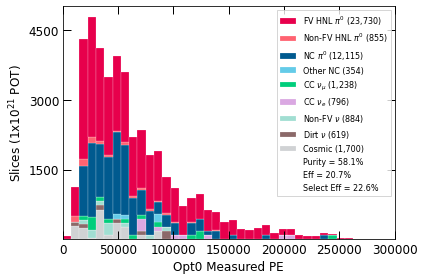

In [59]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_opt0_measPE', 
                    xmin = 0, xmax = 300000, xnbin = 40,
                    xtitle = 'Opt0 Measured PE'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_opt0PE_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Shower Theta</h1>

<h3> Get Primary Shower </h3>

In [60]:
df_hnl_prim = get_primary_shw_df(df_hnl)

df_nu_prim = get_primary_shw_df(df_nu)

df_cos_prim = get_primary_shw_df(df_cos)

<h3> Primary Showers of both 1 and 2+ shower cases </h3>

type 3, pot 88.43293673468362, n_nu 15917.928612243051
type 4, pot 88.43293673468362, n_nu 1061.1952408162035
type 5, pot 88.43293673468362, n_nu 1945.5246081630396
type 6, pot 88.43293673468362, n_nu 2122.390481632407
type 7, pot 88.43293673468362, n_nu 1061.1952408162035
type 8, pot 88.43293673468362, n_nu 1061.1952408162035
type 9, pot 88.43293673468362, n_nu 1591.7928612243052


<Figure size 432x288 with 0 Axes>

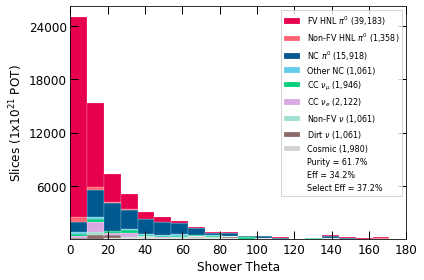

In [61]:
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    xmin = 0, xmax = 180, xnbin = 20,
                    xtitle = 'Shower Theta'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"shower_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


<h3> Split 1 and 2+ shower cases </h3>

In [62]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

#df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> Primary Showers of 1 shower cases </h3>

type 3, pot 88.43293673468362, n_nu 3802.6162795913956
type 4, pot 88.43293673468362, n_nu 707.463493877469
type 5, pot 88.43293673468362, n_nu 707.463493877469
type 6, pot 88.43293673468362, n_nu 1326.4940510202543
type 7, pot 88.43293673468362, n_nu 176.86587346936724
type 8, pot 88.43293673468362, n_nu 442.1646836734181
type 9, pot 88.43293673468362, n_nu 265.2988102040509


<Figure size 432x288 with 0 Axes>

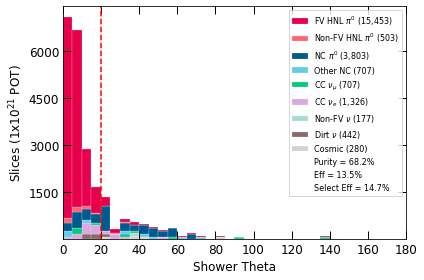

In [63]:
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    xmin = 0, xmax = 180, xnbin = 36,
                    xtitle = 'Shower Theta'
                    )
plt.axvline(x =  TuneCut['OneShowerTheta'], c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


In [64]:
if ifTune:
    vary_Theta(df_hnl_shw1, df_nu_shw1, df_cos_shw1, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/one_shower_theta_tuning.png", dpi =200)

<h3> All Showers of 2+ shower cases </h3>

In [65]:
df_nu_shw2 = df_nu_shw2.apply(pd.Series.explode).reset_index()
df_hnl_shw2 = df_hnl_shw2.apply(pd.Series.explode).reset_index()
df_cos_shw2 = df_cos_shw2.apply(pd.Series.explode).reset_index()

type 3, pot 88.43293673468362, n_nu 12115.312332651656
type 4, pot 88.43293673468362, n_nu 353.7317469387345
type 5, pot 88.43293673468362, n_nu 1238.0611142855707
type 6, pot 88.43293673468362, n_nu 795.8964306121526
type 7, pot 88.43293673468362, n_nu 884.3293673468362
type 8, pot 88.43293673468362, n_nu 619.0305571427854
type 9, pot 88.43293673468362, n_nu 1326.4940510202543


<Figure size 432x288 with 0 Axes>

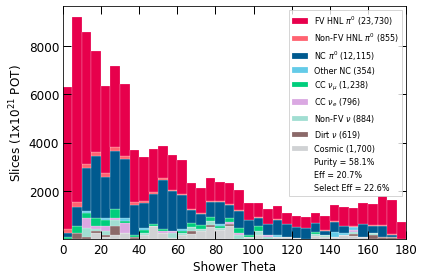

In [66]:
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    xmin = 0, xmax = 180, xnbin = 36,
                    xtitle = 'Shower Theta'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


<h3> Primary Showers of 2+ shower cases </h3>

In [67]:
df_hnl_prim_shw2 = get_primary_shw_df(df_hnl_shw2)

df_nu_prim_shw2 = get_primary_shw_df(df_nu_shw2)

df_cos_prim_shw2 = get_primary_shw_df(df_cos_shw2)

type 3, pot 88.43293673468362, n_nu 12115.312332651656
type 4, pot 88.43293673468362, n_nu 353.7317469387345
type 5, pot 88.43293673468362, n_nu 1238.0611142855707
type 6, pot 88.43293673468362, n_nu 795.8964306121526
type 7, pot 88.43293673468362, n_nu 884.3293673468362
type 8, pot 88.43293673468362, n_nu 619.0305571427854
type 9, pot 88.43293673468362, n_nu 1326.4940510202543


<Figure size 432x288 with 0 Axes>

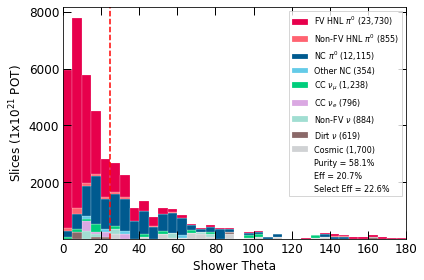

In [68]:
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_theta', 
                    xmin = 0, xmax = 180, xnbin = 36,
                    xtitle = 'Shower Theta'
                    )
plt.axvline(x =  TuneCut['TwoShowerTheta'], c = 'r', linestyle = '--')
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_primary_theta_precut.png", dpi = 200)
#-----------------------------------#
plt.show()


In [69]:
if ifTune:
    vary_Theta(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/two_shower_prim_theta_tuning.png", dpi =200)

<h3>Apply Cut</h3>

<h3> 1 shower only: harsh cut</h3>

In [70]:
angle = TuneCut['OneShowerTheta']
print(angle)

if ifCut:
    df_hnl_shw1 = cutThetaAngle(df_hnl_shw1, thetaAngle = angle) 
    df_nu_shw1 = cutThetaAngle(df_nu_shw1, thetaAngle = angle) 
    df_cos_shw1 = cutThetaAngle(df_cos_shw1, thetaAngle = angle) 
#df_cos = cutThetaAngle(df_cos, thetaAngle = angle) 

20


<h3> 2+ showers: cut on primary + less harsh cut </h3>

In [71]:
angle = TuneCut['TwoShowerTheta']
print(angle)

if ifCut:
    df_hnl_prim_shw2 = cutThetaAngle(df_hnl_prim_shw2, thetaAngle = angle) 
    df_nu_prim_shw2 = cutThetaAngle(df_nu_prim_shw2, thetaAngle = angle) 
    df_cos_prim_shw2 = cutThetaAngle(df_cos_prim_shw2, thetaAngle = angle) 
#df_cos = cutThetaAngle(df_cos, thetaAngle = angle) 

25


In [72]:
df_hnl_shw2 = merge_df_prim(df_hnl_shw2, df_hnl_prim_shw2)

df_nu_shw2 = merge_df_prim(df_nu_shw2, df_nu_prim_shw2)

df_cos_shw2 = merge_df_prim(df_cos_shw2, df_cos_prim_shw2)

In [73]:
df_hnl = apply_shower_cut(df_hnl, df_hnl_shw1, df_hnl_shw2)

df_nu = apply_shower_cut(df_nu, df_nu_shw1, df_nu_shw2)

df_cos = apply_shower_cut(df_cos, df_cos_shw1, df_cos_shw2)

<h3>Save Purity/Eff</h3>

In [74]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("Shower Theta Cut")

print(purity_arr)
print(eff_arr)
print(cut_arr)

type 3, pot 88.43293673468362, n_nu 5925.006761223803
type 4, pot 88.43293673468362, n_nu 442.1646836734181
type 5, pot 88.43293673468362, n_nu 795.8964306121526
type 6, pot 88.43293673468362, n_nu 1503.3599244896216
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0
[0.4, 1.1, 1.3, 6.6, 18.9, 21.9, 61.7, 78.2]
[99.4, 92.5, 66.6, 51.1, 48.1, 46.2, 37.2, 32.4]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Opt0 Fraction', 'Shower Theta Cut']


<h1> Make Beam Bucket - Post Shower Theta</h1>

type 3, pot 88.43293673468362, n_nu 5925.006761223803
type 4, pot 88.43293673468362, n_nu 442.1646836734181
type 5, pot 88.43293673468362, n_nu 795.8964306121526
type 6, pot 88.43293673468362, n_nu 1503.3599244896216
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

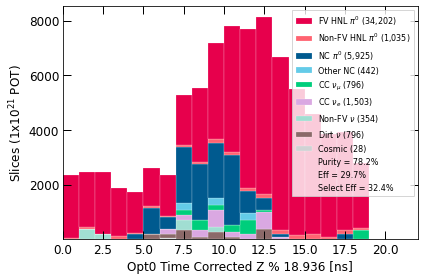

In [75]:
hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 22, xnbin = 22,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_postshowertheta.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Shower Energy, dEdx and Conversion Gap</h1>

<h3> Get Primary Shower </h3>

In [76]:
df_hnl_prim = get_primary_shw_df(df_hnl)

df_nu_prim = get_primary_shw_df(df_nu)

df_cos_prim = get_primary_shw_df(df_cos)

<h3> Primary Showers of both 1 and 2+ shower cases </h3>

type 3, pot 88.43293673468362, n_nu 5925.006761223803
type 4, pot 88.43293673468362, n_nu 442.1646836734181
type 5, pot 88.43293673468362, n_nu 795.8964306121526
type 6, pot 88.43293673468362, n_nu 1503.3599244896216
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

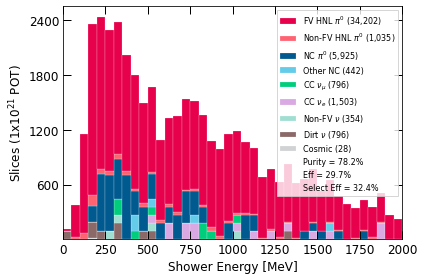

type 3, pot 88.43293673468362, n_nu 5925.006761223803
type 4, pot 88.43293673468362, n_nu 442.1646836734181
type 5, pot 88.43293673468362, n_nu 795.8964306121526
type 6, pot 88.43293673468362, n_nu 1503.3599244896216
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

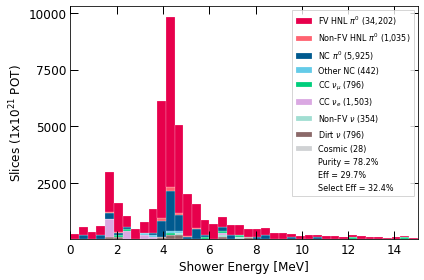

type 3, pot 88.43293673468362, n_nu 5925.006761223803
type 4, pot 88.43293673468362, n_nu 442.1646836734181
type 5, pot 88.43293673468362, n_nu 795.8964306121526
type 6, pot 88.43293673468362, n_nu 1503.3599244896216
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

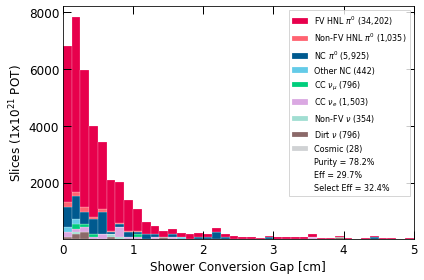

In [77]:
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    xmin = 0, xmax = 2000, xnbin = 40,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"prim_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

#================================================#
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_shower_dedx', 
                    xmin = 0, xmax = 15, xnbin = 40,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"prim_shower_dedx_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()    
    
#================================================#
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"prim_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Split into 1 shower and multi shower case </h3>

In [78]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

#df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

<h3> Primary Showers of 1 shower cases </h3>

type 3, pot 88.43293673468362, n_nu 1414.926987754938
type 4, pot 88.43293673468362, n_nu 265.2988102040509
type 5, pot 88.43293673468362, n_nu 265.2988102040509
type 6, pot 88.43293673468362, n_nu 884.3293673468362
type 7, pot 88.43293673468362, n_nu 0.0
type 8, pot 88.43293673468362, n_nu 353.7317469387345
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

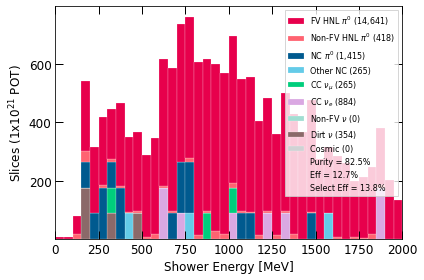

type 3, pot 88.43293673468362, n_nu 1414.926987754938
type 4, pot 88.43293673468362, n_nu 265.2988102040509
type 5, pot 88.43293673468362, n_nu 265.2988102040509
type 6, pot 88.43293673468362, n_nu 884.3293673468362
type 7, pot 88.43293673468362, n_nu 0.0
type 8, pot 88.43293673468362, n_nu 353.7317469387345
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

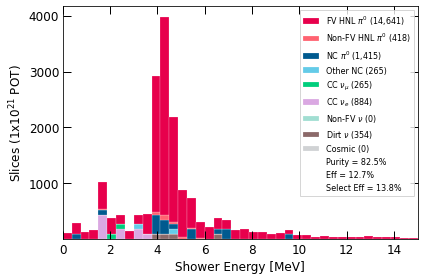

type 3, pot 88.43293673468362, n_nu 1414.926987754938
type 4, pot 88.43293673468362, n_nu 265.2988102040509
type 5, pot 88.43293673468362, n_nu 265.2988102040509
type 6, pot 88.43293673468362, n_nu 884.3293673468362
type 7, pot 88.43293673468362, n_nu 0.0
type 8, pot 88.43293673468362, n_nu 353.7317469387345
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

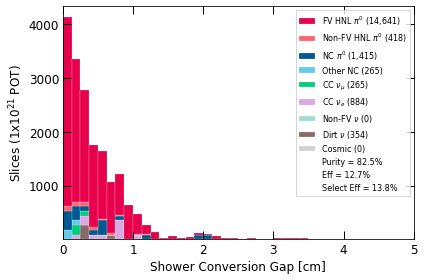

In [79]:
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    xmin = 0, xmax = 2000, xnbin = 40,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

#================================================#
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_dedx', 
                    xmin = 0, xmax = 15, xnbin = 40,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_dedx_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()    
    
#================================================#
#plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos_shw1,
plot_slc_var(df_hnl_shw1, df_nu_shw1, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"one_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3>Apply Cut</h3>

In [80]:
if ifCut:
    df_hnl_shw1 = df_hnl_shw1[df_hnl_shw1['slc_pfp_shower_dedx'] > 3.5]
    df_nu_shw1 = df_nu_shw1[df_nu_shw1['slc_pfp_shower_dedx'] > 3.5]
    df_cos = df_cos[df_cos['slc_pfp_shower_dedx'] > 3.5]
#df_cos = cutThetaAngle(df_cos, thetaAngle = angle) 

<h3> All Showers of 2+ shower cases </h3>

In [81]:
df_nu_shw2 = df_nu_shw2.apply(pd.Series.explode).reset_index()
df_hnl_shw2 = df_hnl_shw2.apply(pd.Series.explode).reset_index()
#df_cos_shw2 = df_cos_shw2.apply(pd.Series.explode).reset_index()

<h3> All Showers of 2+ shower cases </h3>

type 3, pot 88.43293673468362, n_nu 4510.079773468865
type 4, pot 88.43293673468362, n_nu 176.86587346936724
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 619.0305571427854
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 442.1646836734181
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

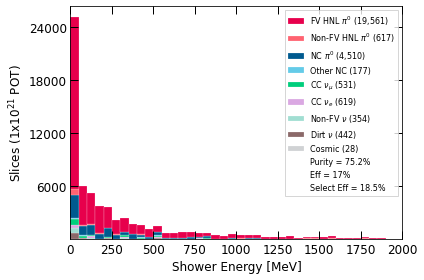

type 3, pot 88.43293673468362, n_nu 4510.079773468865
type 4, pot 88.43293673468362, n_nu 176.86587346936724
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 619.0305571427854
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 442.1646836734181
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

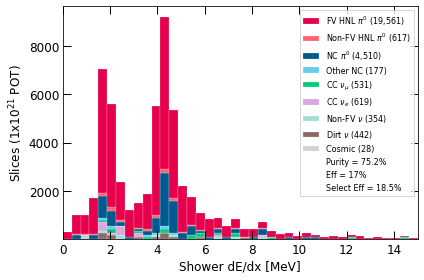

type 3, pot 88.43293673468362, n_nu 4510.079773468865
type 4, pot 88.43293673468362, n_nu 176.86587346936724
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 619.0305571427854
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 442.1646836734181
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

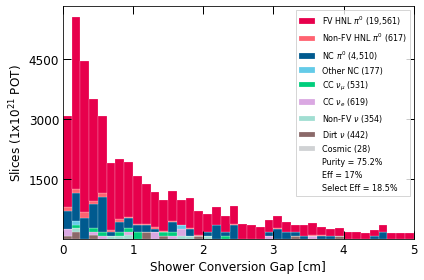

In [82]:
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    xmin = 0, xmax = 2000, xnbin = 40,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

#================================================#
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_dedx', 
                    xmin = 0, xmax = 15, xnbin = 40,
                    xtitle = 'Shower dE/dx [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_dedx_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()    
    
#================================================#
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Primary Showers of 2+ shower cases </h3>

In [83]:
df_hnl_prim_shw2 = get_primary_shw_df(df_hnl_shw2)

df_nu_prim_shw2 = get_primary_shw_df(df_nu_shw2)

#df_cos_prim_shw2 = get_primary_shw_df(df_cos_shw2)
df_cos_prim_shw2 = get_primary_shw_df(df_cos)

type 3, pot 88.43293673468362, n_nu 4510.079773468865
type 4, pot 88.43293673468362, n_nu 176.86587346936724
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 619.0305571427854
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 442.1646836734181
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

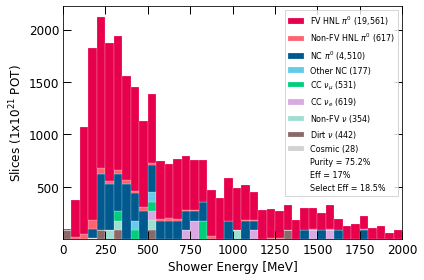

type 3, pot 88.43293673468362, n_nu 4510.079773468865
type 4, pot 88.43293673468362, n_nu 176.86587346936724
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 619.0305571427854
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 442.1646836734181
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

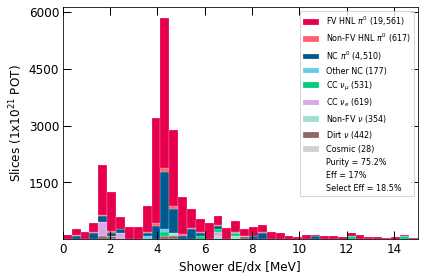

type 3, pot 88.43293673468362, n_nu 4510.079773468865
type 4, pot 88.43293673468362, n_nu 176.86587346936724
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 619.0305571427854
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 442.1646836734181
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

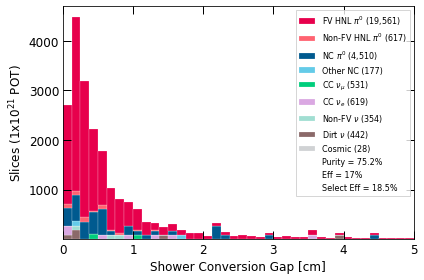

In [84]:
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'slc_pfp_shower_energy', 
                    xmin = 0, xmax = 2000, xnbin = 40,
                    xtitle = 'Shower Energy [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_prim_shower_energy_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

#================================================#
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'slc_pfp_shower_dedx', 
                    xmin = 0, xmax = 15, xnbin = 40,
                    xtitle = 'Shower dE/dx [MeV]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_prim_shower_dedx_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()    
    
#================================================#
#plot_slc_var(df_hnl_shw2, df_nu_shw2, df_cos_shw2,
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'slc_pfp_shower_conv_gap', 
                    xmin = 0, xmax = 5, xnbin = 40,
                    xtitle = 'Shower Conversion Gap [cm]'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"two_prim_shower_convgap_postpid.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3>Merge 1 and 2 Showers Back</h3>

In [85]:
df_hnl = apply_shower_cut(df_hnl, df_hnl_shw1, df_hnl_shw2)

df_nu = apply_shower_cut(df_nu, df_nu_shw1, df_nu_shw2)

#df_cos = apply_shower_cut(df_cos, df_cos_shw1, df_cos_shw2)

<h3>Save Purity/Eff</h3>

In [86]:
purity, eff = calc_purity_eff(df_hnl, df_nu, df_cos, true_counts, start_counts)

purity_arr.append(purity)
eff_arr.append(eff)
cut_arr.append("dE/dx")

print(purity_arr)
print(eff_arr)
print(cut_arr)

type 3, pot 88.43293673468362, n_nu 5748.140887754435
type 4, pot 88.43293673468362, n_nu 265.2988102040509
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 707.463493877469
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0
[0.4, 1.1, 1.3, 6.6, 18.9, 21.9, 61.7, 78.2, 79.6]
[99.4, 92.5, 66.6, 51.1, 48.1, 46.2, 37.2, 32.4, 30.2]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Opt0 Fraction', 'Shower Theta Cut', 'dE/dx']


<h1>PFP N Hits</h1>

type 3, pot 88.43293673468362, n_nu 5748.140887754435
type 4, pot 88.43293673468362, n_nu 265.2988102040509
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 707.463493877469
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

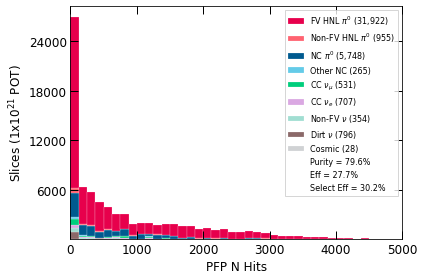

In [87]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_n_hits', 
                    xmin = 0, xmax = 5000, xnbin = 40,
                    xtitle = 'PFP N Hits'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"pfp_nhits.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Track Score</h1>

type 3, pot 88.43293673468362, n_nu 5748.140887754435
type 4, pot 88.43293673468362, n_nu 265.2988102040509
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 707.463493877469
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

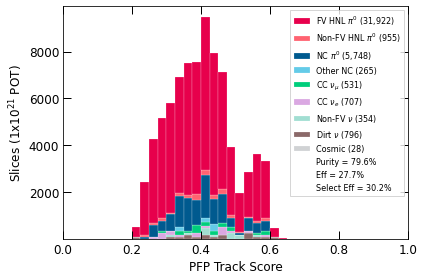

In [88]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_track_score', 
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Track Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"track_score.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Multiplicity</h1>

type 3, pot 88.43293673468362, n_nu 5748.140887754435
type 4, pot 88.43293673468362, n_nu 265.2988102040509
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 707.463493877469
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

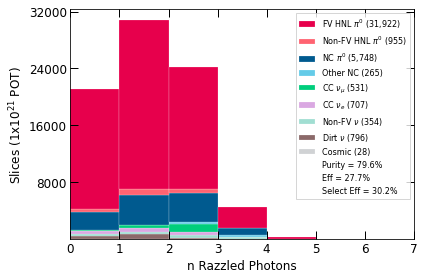

type 3, pot 88.43293673468362, n_nu 5748.140887754435
type 4, pot 88.43293673468362, n_nu 265.2988102040509
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 707.463493877469
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

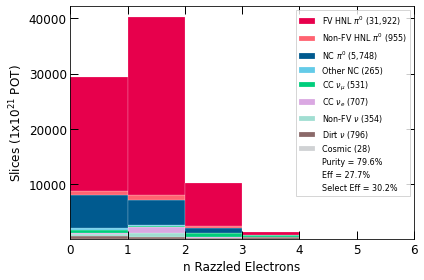

In [89]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_photons', 
                    xmin = 0, xmax = 7, xnbin = 7,
                    xtitle = 'n Razzled Photons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_photon.png", dpi = 200)
#-----------------------------------#
plt.show()
#==========================================================#
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_electrons', 
                    xmin = 0, xmax = 6, xnbin = 6,
                    xtitle = 'n Razzled Electrons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_photon.png", dpi = 200)
#-----------------------------------#
plt.show()

In [90]:
group_hnl = df_hnl.groupby(['run', 'subrun', 'event', 'slc_idx','slc_comp', 'slc_true_event_type', 'scale_pot'])['slc_pfp_shower_energy'].apply(list).reset_index()
group_hnl['n_pfp'] = group_hnl.apply(lambda row: len(row['slc_pfp_shower_energy']), axis=1)
group_hnl = group_hnl.drop(['slc_pfp_shower_energy'], axis = 1)

In [91]:
group_nu = df_nu.groupby(['run', 'subrun', 'event', 'slc_idx','slc_comp', 'slc_true_event_type', 'scale_pot'])['slc_pfp_shower_energy'].apply(list).reset_index()
group_nu['n_pfp'] = group_nu.apply(lambda row: len(row['slc_pfp_shower_energy']), axis=1)
group_nu = group_nu.drop(['slc_pfp_shower_energy'], axis = 1)

In [92]:
df_cos['n_pfp'] = ""

In [93]:
plot_slc_var(group_hnl, group_nu, df_cos,
                    true_counts, start_counts, 
                    'n_pfp', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n PFPs'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"n_pfps.png", dpi = 200)
#-----------------------------------#
plt.show()


KeyError: "['slc_id'] not in index"

<h1>Electron Rejection (?)</h1>

<h3> All PFP Shower </h3>

In [ ]:
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_electron_score', 
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Electron Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_electron_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Get Primary Shower </h3>

In [ ]:
df_hnl_prim = get_primary_shw_df(df_hnl)

df_nu_prim = get_primary_shw_df(df_nu)

df_cos_prim = get_primary_shw_df(df_cos)

<h3> Primary Shower </h3>

In [ ]:
#----------------------------------------------
plot_slc_var(df_hnl_prim[df_hnl_prim['slc_pfp_razzled_electron_score'] < 0.95]
            , df_nu_prim[df_nu_prim['slc_pfp_razzled_electron_score'] < 0.95]
             , df_cos_prim[df_cos_prim['slc_pfp_razzled_electron_score'] < 0.95],
                    true_counts, start_counts, 
                    'slc_pfp_razzled_electron_score', 
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Electron Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_electron_score_prim_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Photon Selection (?)</h1>

<h3> All PFP Shower </h3>

In [ ]:
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_n_razzled_photons', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Razzled Photons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_photon_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_photon_score', 
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Photon Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_photon_score_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h3> Primary Shower </h3>

In [ ]:
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_n_razzled_photons', 
                    xmin = 0, xmax = 10, xnbin = 10,
                    xtitle = 'n Razzled Photons'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"nrazzled_photon_prim_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()
#----------------------------------------------
plot_slc_var(df_hnl_prim, df_nu_prim, df_cos_prim,
                    true_counts, start_counts, 
                    'slc_pfp_razzled_photon_score', 
                    xmin = 0, xmax = 1, xnbin = 40,
                    xtitle = 'PFP Razzled Photon Score'
                    )
#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"razzled_photon_score_prim_shw_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>2 Shower Case: Pi0 Mass </h1>

<h3> Split into 1 shower and multi shower case again! </h3>

In [ ]:
df_hnl_shw1, df_hnl_shw2 = split_my_df(df_hnl)

df_nu_shw1, df_nu_shw2 = split_my_df(df_nu)

#df_cos_shw1, df_cos_shw2 = split_my_df(df_cos)

In [ ]:
df_hnl_shw2['pi0_mass'] = df_hnl_shw2.apply(lambda row: pi0mass(row), axis = 1)

df_nu_shw2['pi0_mass'] = df_nu_shw2.apply(lambda row: pi0mass(row), axis = 1)

df_cos['pi0_mass']  = ""
#df_cos_shw2['pi0_mass'] = df_cos_shw2.apply(lambda row: pi0mass(row), axis = 1)


In [ ]:
df_hnl_prim_shw2 = get_primary_shw_df(df_hnl_shw2)

df_nu_prim_shw2 = get_primary_shw_df(df_nu_shw2)

#df_cos_prim_shw2 = get_primary_shw_df(df_cos_shw2)
df_cos_prim_shw2 = get_primary_shw_df(df_cos)

In [ ]:
plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos,
#plot_slc_var(df_hnl_prim_shw2, df_nu_prim_shw2, df_cos_prim_shw2,
                    true_counts, start_counts, 
                    'pi0_mass', 
                    xmin = 0, xmax = 600, xnbin = 40,
                    xtitle = 'Pi 0 Mass [MeV]'
            )
# only one line may be specified; full height
plt.axvline(x = 135, color = col_dict['Purple'], linewidth = 3)

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"pizero_mass_precut.png", dpi = 200)
#-----------------------------------#

plt.show()

<h1>Between Bucket Cut</h1>

type 3, pot 88.43293673468362, n_nu 5748.140887754435
type 4, pot 88.43293673468362, n_nu 265.2988102040509
type 5, pot 88.43293673468362, n_nu 530.5976204081018
type 6, pot 88.43293673468362, n_nu 707.463493877469
type 7, pot 88.43293673468362, n_nu 353.7317469387345
type 8, pot 88.43293673468362, n_nu 795.8964306121526
type 9, pot 88.43293673468362, n_nu 0.0


<Figure size 432x288 with 0 Axes>

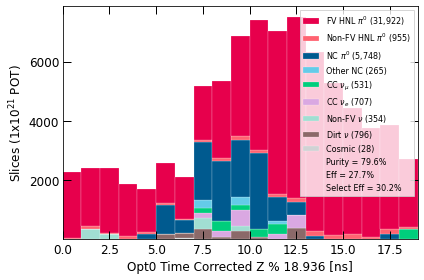

In [94]:
hist, bins = plot_slc_var(
                    df_hnl
                    , df_nu
                    , df_cos
                    , true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 19, xnbin = 19,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]'
                    )

#-----------------------------------#
if ifSave:
    #fig.tight_layout()
    plt.savefig(savePath+"beam_bucket_precut.png", dpi = 200)
#-----------------------------------#
plt.show()

In [ ]:
ifTune = True
if ifTune:
    vary_Modt(df_hnl, df_nu, df_cos, true_counts, start_counts)
    if ifSave:
        plt.savefig(savePath+"/modt_tuning.png", dpi =200)

<h3>Apply Cut</h3>

<h3>Save Purity/Eff</h3>

<h1>Plot Purity/Efficiency </h1>

In [95]:
print(eff_arr)
print(purity_arr)
print(cut_arr)

[99.4, 92.5, 66.6, 51.1, 48.1, 46.2, 37.2, 32.4, 30.2]
[0.4, 1.1, 1.3, 6.6, 18.9, 21.9, 61.7, 78.2, 79.6]
['Clear Cosmics Removal', 'CRUMBS', 'Vertex In FV', 'Muon Cut', 'Proton Cut', 'Pion Cut', 'Opt0 Fraction', 'Shower Theta Cut', 'dE/dx']


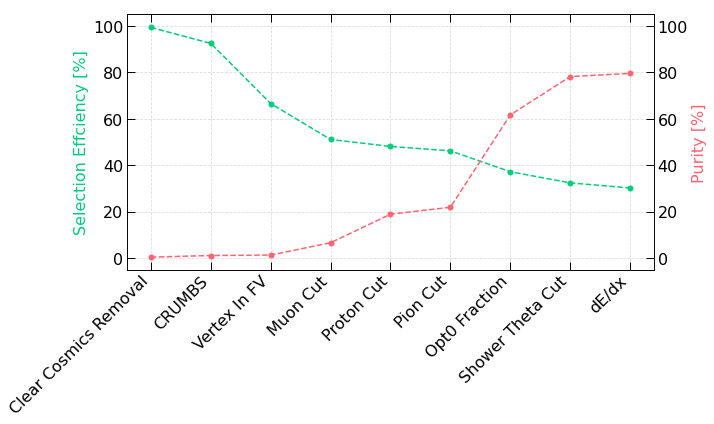

In [96]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6), sharex = True)
ax2 = ax1.twinx()

t = np.arange(0, len(cut_arr) , 1)

effcol = col_dict['MintGreen']
pcol = col_dict['Flamingo']

ax1.plot(t, eff_arr, c = effcol, marker = 'o', markersize = 5, ls='--')
ax2.plot(t, purity_arr, c = pcol, marker = 'o', markersize = 5, ls='--')

ax1.set_ylim(-5,105)
ax2.set_ylim(-5,105)

ax1.grid(color='gainsboro', which='both', axis='both', linestyle='--')

ax1.set_ylabel("Selection Effciency [%]", c = effcol, fontsize = 16)
ax2.set_ylabel("Purity [%]", c = pcol, fontsize = 16)

plt.xticks(range(0, len(t)))
ax1.set_xticklabels(cut_arr, rotation = 45, ha="right", fontsize = 16)

ax1.tick_params(bottom = True, top = True, left = True, right = False)
ax2.tick_params(bottom = True, top = True, left = False, right = True)

ax1.tick_params(axis = 'x', labelsize = 16, direction = 'in')
ax1.tick_params(axis = 'y', labelsize = 16, direction = 'in')
ax2.tick_params(axis = 'y', labelsize = 16, direction = 'in')

fig.tight_layout()

#-----------------------------------#
if ifSave:
    plt.savefig(savePath+"peff.png", dpi = 200)
#-----------------------------------#
plt.show()

<h1>Save Only Primary Showers </h1>

In [ ]:
df_hnl = get_primary_shw_df(df_hnl)

df_nu = get_primary_shw_df(df_nu)

df_cos = get_primary_shw_df(df_cos)
#df_cos_prim_shw2 = get_primary_shw_df(df_cos)

In [ ]:
df_hnl

In [ ]:
df_nu

In [ ]:
df_cos

In [ ]:
df_hnl[(df_hnl['run'] == 1) & (df_hnl['subrun']==790) & (df_hnl['event']==39)]

<h1> Save Cut Dataframe to Pickle</h1>

In [ ]:
df_hnl.to_pickle("../pkl_files/v3/df_m"+str(m)+"_v3_hnl.pkl", protocol = 5)

In [ ]:
df_nu.to_pickle("../pkl_files/v3/df_m"+str(m)+"_v3_nu.pkl", protocol = 5)

In [ ]:
df_cos.to_pickle("../pkl_files/v3/df_m"+str(m)+"_v3_cos.pkl", protocol = 5)